In [339]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.tsa.tsatools import detrend
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.decomposition import FastICA
from pandas import DataFrame, Series
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import io

%matplotlib inline
np.set_printoptions(precision=3 , suppress= True)

In [352]:
#importing the file and defining the columns I am going to work with:

#file_path = code for get the file without me doing manually. 
#Probably it needs an excel sheet with the names and apply 'for' to read them.

columnsName_file = ['YYMMMDD', '__east(m)']

filePath1 = '/home/rafaela/internship/time_series/Time-Series-Analysis/Cansiglio Plateau + Classical Karst/brse.txt'
station1 = pd.read_csv(filePath1, usecols = columnsName_file, delimiter = '\s+')

filePath2 = '/home/rafaela/internship/time_series/Time-Series-Analysis/Cansiglio Plateau + Classical Karst/mpra.txt'
station2 = pd.read_csv(filePath2, usecols = columnsName_file, delimiter = '\s+')

filePath3 = '/home/rafaela/internship/time_series/Time-Series-Analysis/Cansiglio Plateau + Classical Karst/pord.txt'
station3 = pd.read_csv(filePath3, usecols = columnsName_file, delimiter = '\s+')

print('BRSE', station1)
print('MPRA', station2)
print('PORD', station3)

BRSE       YYMMMDD  __east(m)
0     10JUN12  -0.602588
1     10JUN13  -0.604064
2     10JUN14  -0.603825
3     10JUN15  -0.602366
4     10JUN16  -0.603291
...       ...        ...
3053  19JUN30  -0.428062
3054  19JUL01  -0.427384
3055  19JUL02  -0.429304
3056  19JUL03  -0.429537
3057  19JUL04  -0.427183

[3058 rows x 2 columns]
MPRA       YYMMMDD  __east(m)
0     02AUG09  -0.044150
1     02AUG10  -0.047696
2     02AUG11  -0.048787
3     02AUG12  -0.049708
4     02AUG13  -0.049089
...       ...        ...
7554  24JAN02   0.391477
7555  24JAN03   0.395028
7556  24JAN04   0.392856
7557  24JAN05   0.391546
7558  24JAN06   0.391431

[7559 rows x 2 columns]
PORD       YYMMMDD  __east(m)
0     06AUG25  -0.516736
1     06AUG26  -0.517955
2     06AUG27  -0.518386
3     06AUG28  -0.516901
4     06AUG29  -0.518053
...       ...        ...
5869  22DEC27  -0.175921
5870  22DEC28  -0.178189
5871  22DEC29  -0.176989
5872  22DEC30  -0.178170
5873  22DEC31  -0.176916

[5874 rows x 2 columns]


In [353]:
#changing the dtype of 'YYMMMDD':
station1['YYMMMDD'] = pd.to_datetime(station1['YYMMMDD'], format='%y%b%d')
station2['YYMMMDD'] = pd.to_datetime(station2['YYMMMDD'], format='%y%b%d')
station3['YYMMMDD'] = pd.to_datetime(station3['YYMMMDD'], format='%y%b%d')

#setting 'YYMMMDD' as index:
station1.set_index('YYMMMDD', inplace = True)
station2.set_index('YYMMMDD', inplace = True)
station3.set_index('YYMMMDD', inplace = True)

#date
station1 = station1.loc['2011-01-15':'2018-07-15']
station2 = station2.loc['2011-01-15':'2018-07-15']
station3 = station3.loc['2011-01-15':'2018-07-15']



print('BRSE', station1)
print('MPRA', station2)
print('PORD', station3)

BRSE             __east(m)
YYMMMDD              
2011-01-15  -0.590748
2011-01-16  -0.590841
2011-01-17  -0.592690
2011-01-18  -0.592770
2011-01-19  -0.590746
...               ...
2018-07-11  -0.438925
2018-07-12  -0.437142
2018-07-13  -0.438114
2018-07-14  -0.439656
2018-07-15  -0.439180

[2575 rows x 1 columns]
MPRA             __east(m)
YYMMMDD              
2011-01-15   0.126120
2011-01-16   0.126736
2011-01-17   0.125353
2011-01-18   0.125557
2011-01-19   0.126959
...               ...
2018-07-11   0.279312
2018-07-12   0.280467
2018-07-13   0.281665
2018-07-14   0.282317
2018-07-15   0.281199

[2667 rows x 1 columns]
PORD             __east(m)
YYMMMDD              
2011-01-15  -0.426474
2011-01-16  -0.426743
2011-01-17  -0.428277
2011-01-18  -0.427432
2011-01-19  -0.425891
...               ...
2018-07-11  -0.272596
2018-07-12  -0.271376
2018-07-13  -0.272706
2018-07-14  -0.271336
2018-07-15  -0.271645

[2709 rows x 1 columns]


In [354]:
#getting the linear model to substract from the original time series:
#BRSE

x1 = np.arange(len(station1)).reshape(-1,1)

#linear trend - EAST
brse_yE = station1['__east(m)'].values.reshape(-1,1)
brse_linearModelE = LinearRegression().fit(x1,brse_yE)
brse_regressionLineE = brse_linearModelE.predict(x1)

brse_detrendedLinear_east = station1['__east(m)'].values - brse_regressionLineE.flatten()
print(f"BRSE - Linear Detrended (east): {brse_detrendedLinear_east}")

#changig the results to a 'DataFrame' format:
linearDetrended_brseE = pd.DataFrame(brse_detrendedLinear_east, index=station1.index, columns=['brse_east(m)'])

print(f"BRSE - Linear Detrended (east): {linearDetrended_brseE.loc['2011-01-15':'2018-07-15']}")

BRSE - Linear Detrended (east): [-0.001 -0.001 -0.003 ... -0.001 -0.003 -0.002]
BRSE - Linear Detrended (east):             brse_east(m)
YYMMMDD                 
2011-01-15     -0.000836
2011-01-16     -0.000989
2011-01-17     -0.002897
2011-01-18     -0.003036
2011-01-19     -0.001072
...                  ...
2018-07-11     -0.001651
2018-07-12      0.000072
2018-07-13     -0.000959
2018-07-14     -0.002561
2018-07-15     -0.002144

[2575 rows x 1 columns]


In [355]:
#getting the linear model to substract from the original time series:
#MPRA

x2 = np.arange(len(station2)).reshape(-1,1)

#linear trend - EAST
mpra_yE = station2['__east(m)'].values.reshape(-1,1)
mpra_linearModelE = LinearRegression().fit(x2,mpra_yE)
mpra_regressionLineE = mpra_linearModelE.predict(x2)

mpra_detrendedLinear_east = station2['__east(m)'].values - mpra_regressionLineE.flatten()
print(f"MPRA - Linear Detrended (east): {mpra_detrendedLinear_east}")

#changig the results to a 'DataFrame' format:
linearDetrended_mpraE = pd.DataFrame(mpra_detrendedLinear_east, index=station2.index, columns=['mpra_east(m)'])

print(f"MPRA - Linear Detrended (east): {linearDetrended_mpraE.loc['2011-01-15':'2018-07-15']}")

MPRA - Linear Detrended (east): [ 0.     0.001 -0.001 ...  0.001  0.001 -0.   ]
MPRA - Linear Detrended (east):             mpra_east(m)
YYMMMDD                 
2011-01-15      0.000175
2011-01-16      0.000732
2011-01-17     -0.000709
2011-01-18     -0.000563
2011-01-19      0.000781
...                  ...
2018-07-11     -0.001729
2018-07-12     -0.000632
2018-07-13      0.000508
2018-07-14      0.001101
2018-07-15     -0.000075

[2667 rows x 1 columns]


In [356]:
#getting the linear model to substract from the original time series:
#PORD

x3 = np.arange(len(station3)).reshape(-1,1)

#Linear trend - EAST
pord_YE = station3['__east(m)'].values.reshape(-1,1)
pord_linearModelE = LinearRegression().fit(x3,pord_YE)
pord_regressionLineE = pord_linearModelE.predict(x3)

pord_detrendedLinear_east = station3['__east(m)'].values - pord_regressionLineE.flatten()
print(f"PORD - Linear Detrended (east): {pord_detrendedLinear_east}")

#changig the results to a 'DataFrame' format:
linearDetrended_pordE = pd.DataFrame(pord_detrendedLinear_east, index=station3.index, columns=['pord_east(m)'])

print(f"MPRA - Linear Detrended (east): {linearDetrended_pordE}")

PORD - Linear Detrended (east): [ 0.001  0.001 -0.001 ... -0.002 -0.001 -0.001]
MPRA - Linear Detrended (east):             pord_east(m)
YYMMMDD                 
2011-01-15      0.000907
2011-01-16      0.000580
2011-01-17     -0.001012
2011-01-18     -0.000225
2011-01-19      0.001258
...                  ...
2018-07-11     -0.002078
2018-07-12     -0.000916
2018-07-13     -0.002304
2018-07-14     -0.000992
2018-07-15     -0.001359

[2709 rows x 1 columns]


In [358]:
#selecting the outliers and removing them:
limiarZ = 2.0

#BRSE
#EAST
brseE_linearDet_noOut = linearDetrended_brseE[(np.abs(linearDetrended_brseE-linearDetrended_brseE.mean()) 
                                              < limiarZ*linearDetrended_brseE.std())]

print(f"BRSE - Linear Detrended Outliers Removed (east): {brseE_linearDet_noOut}")

#MPRA
#EAST
mpraE_linearDet_noOut = linearDetrended_mpraE[(np.abs(linearDetrended_mpraE-linearDetrended_mpraE.mean()) 
                                              < limiarZ*linearDetrended_mpraE.std())]

print(f"MPRA - Linear Detrended Outliers Removed (east): {mpraE_linearDet_noOut}")

#PORD
#EAST
pordE_linearDet_noOut = linearDetrended_pordE[(np.abs(linearDetrended_pordE-linearDetrended_pordE.mean()) 
                                              < limiarZ*linearDetrended_pordE.std())]

print(f"PORD - Linear Detrended Outliers Removed (east): {pordE_linearDet_noOut}")

BRSE - Linear Detrended Outliers Removed (east):             brse_east(m)
YYMMMDD                 
2011-01-15     -0.000836
2011-01-16     -0.000989
2011-01-17     -0.002897
2011-01-18     -0.003036
2011-01-19     -0.001072
...                  ...
2018-07-11     -0.001651
2018-07-12      0.000072
2018-07-13     -0.000959
2018-07-14     -0.002561
2018-07-15     -0.002144

[2575 rows x 1 columns]
MPRA - Linear Detrended Outliers Removed (east):             mpra_east(m)
YYMMMDD                 
2011-01-15      0.000175
2011-01-16      0.000732
2011-01-17     -0.000709
2011-01-18     -0.000563
2011-01-19      0.000781
...                  ...
2018-07-11     -0.001729
2018-07-12     -0.000632
2018-07-13      0.000508
2018-07-14      0.001101
2018-07-15     -0.000075

[2667 rows x 1 columns]
PORD - Linear Detrended Outliers Removed (east):             pord_east(m)
YYMMMDD                 
2011-01-15      0.000907
2011-01-16      0.000580
2011-01-17     -0.001012
2011-01-18     -0.000225
201

In [359]:
#dropping the NaN values

#BRSE
brseE_linearDet_noOut.dropna(inplace=True)
print(f"BRSE - Linear Detrended Outliers Removed (east): {len(brseE_linearDet_noOut)}")

#MPRA
mpraE_linearDet_noOut.dropna(inplace=True)
print(f"MPRA - Linear Detrended Outliers Removed (east): {len(mpraE_linearDet_noOut)}")

#PORD
pordE_linearDet_noOut.dropna(inplace=True)

print(f"PORD - Linear Detrended Outliers Removed (east): {len(pordE_linearDet_noOut)}")

BRSE - Linear Detrended Outliers Removed (east): 2468
MPRA - Linear Detrended Outliers Removed (east): 2545
PORD - Linear Detrended Outliers Removed (east): 2601


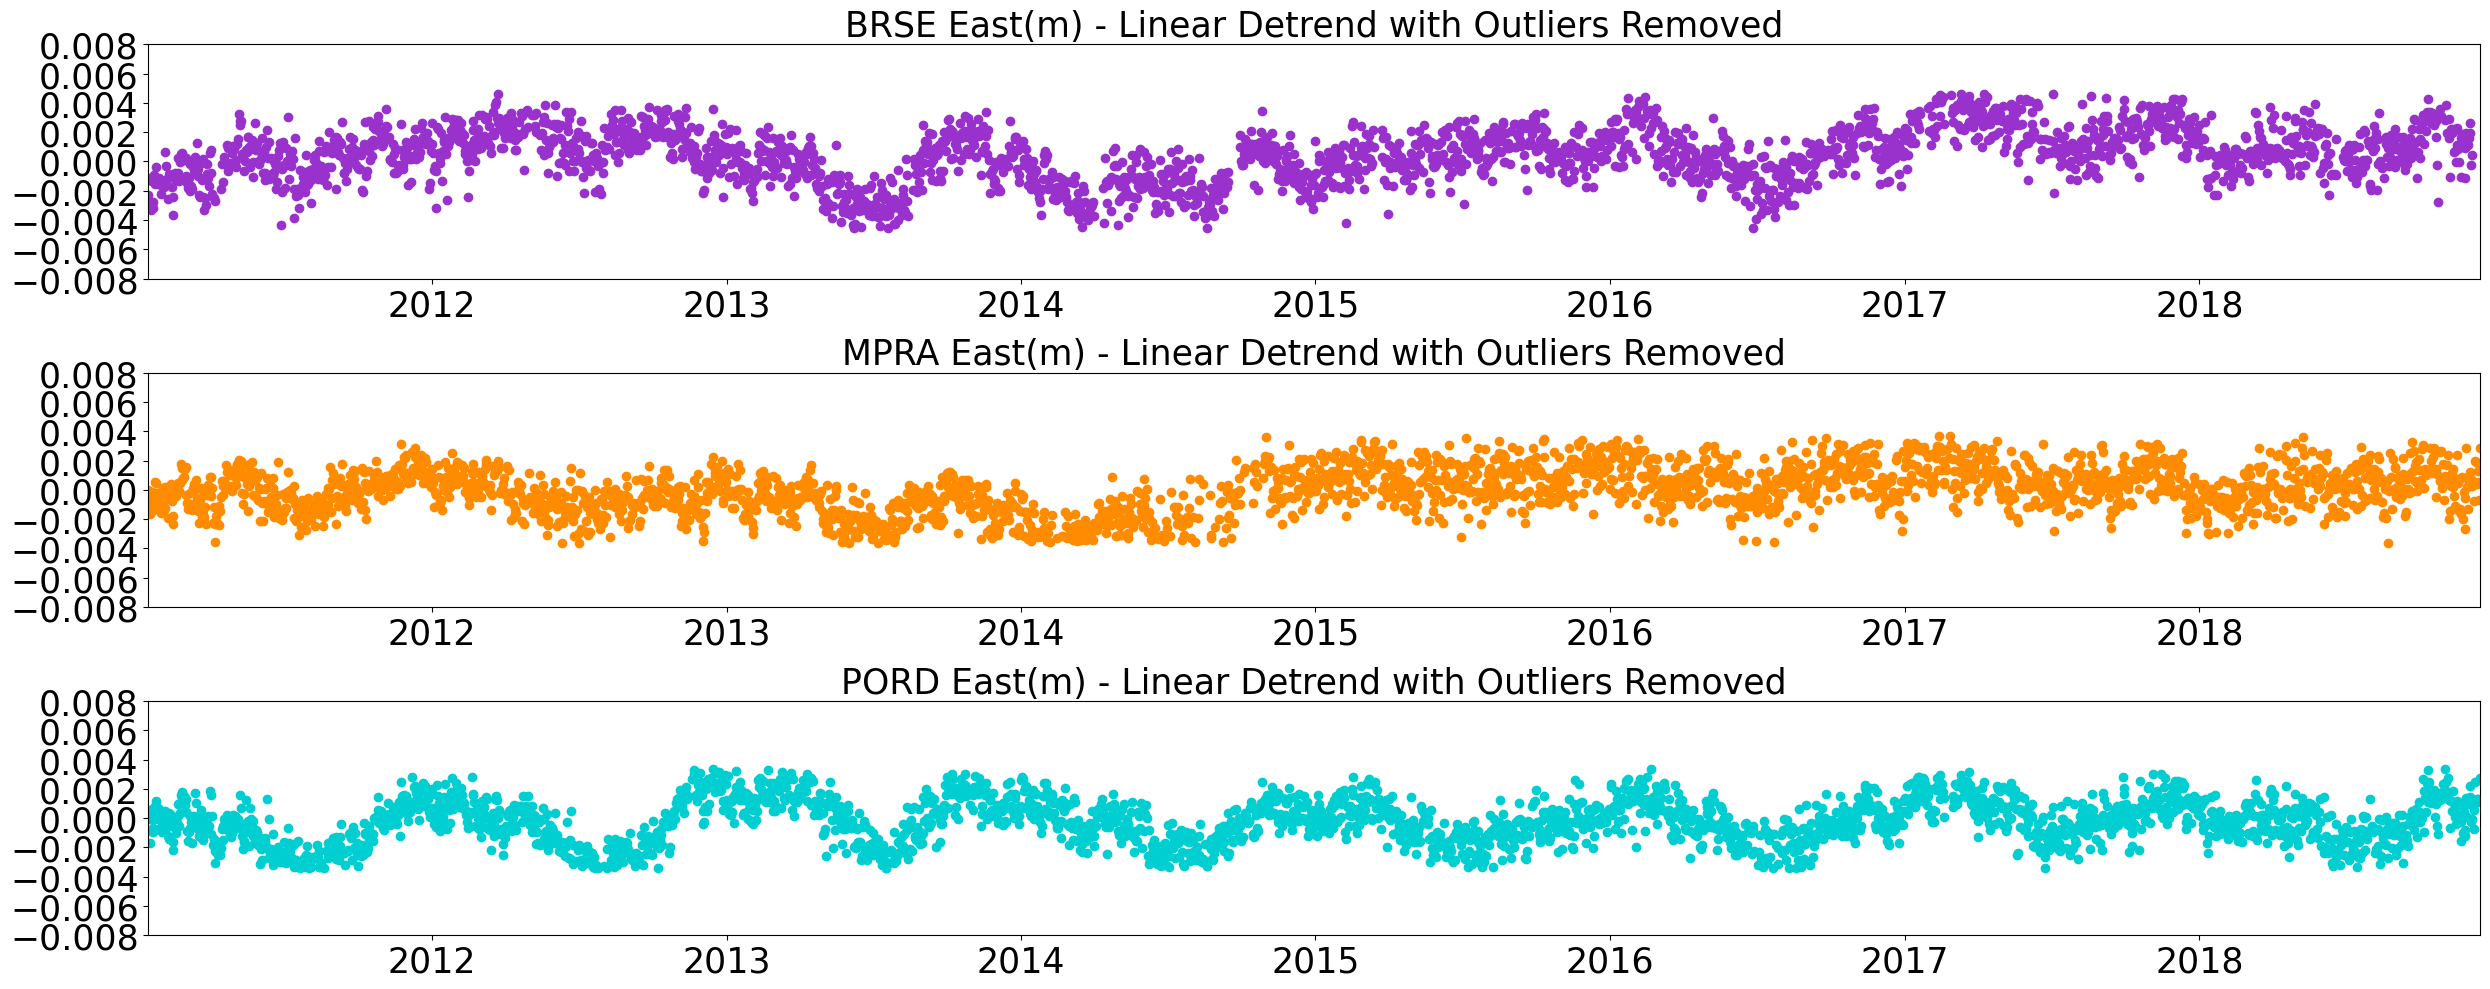

In [316]:
#comparison between EAST(m) - stations BRSE and MPRA:
fig=plt.figure(figsize=(25,10))

#BRSE
plt.subplot(3, 1, 1)
plt.plot(brseE_linearDet_noOut, 'o', color='darkorchid')
plt.title('BRSE East(m) - Linear Detrend with Outliers Removed', fontsize = 25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylim(-0.008,0.008)
plt.xlim(pd.Timestamp('2011-01-15'), pd.Timestamp('2018-12-15'))

#MPRA
plt.subplot(3, 1, 2)
plt.plot(mpraE_linearDet_noOut, 'o', color='darkorange')
plt.title('MPRA East(m) - Linear Detrend with Outliers Removed', fontsize = 25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylim(-0.008,0.008)
plt.xlim(pd.Timestamp('2011-01-15'), pd.Timestamp('2018-12-15'))

#PORD
plt.subplot(3, 1, 3)
plt.plot(pordE_linearDet_noOut, 'o', color='darkturquoise')
plt.title('PORD East(m) - Linear Detrend with Outliers Removed', fontsize = 25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylim(-0.008,0.008)
plt.xlim(pd.Timestamp('2011-01-15'), pd.Timestamp('2018-12-15'))

fl = 'brse_mpra_pord_east.svg'
f = io.BytesIO()
#plt.savefig(fl, format="svg")

plt.tight_layout()
plt.show()

In [317]:
#BRSE
brse_rolmeanE = brseE_linearDet_noOut.rolling(8, min_periods=1).mean()
print(f"Rolling Mean BRSE east: {brse_rolmeanE}")

#MPRA
mpra_rolmeanE = mpraE_linearDet_noOut.rolling(8, min_periods=1).mean()
print(f"Rolling Mean MPRA east: {mpra_rolmeanE}")

#PORD
pord_rolmeanE = pordE_linearDet_noOut.rolling(8, min_periods=1).mean()
print(f"Rolling Mean MPRA east: {pord_rolmeanE}")

Rolling Mean BRSE east:             brse_east(m)
YYMMMDD                 
2010-06-12     -0.001771
2010-06-13     -0.002538
2010-06-14     -0.002734
2010-06-15     -0.002482
2010-06-16     -0.002527
...                  ...
2019-05-10     -0.003268
2019-05-18     -0.003290
2019-05-19     -0.003440
2019-05-20     -0.003760
2019-06-11     -0.003716

[2908 rows x 1 columns]
Rolling Mean MPRA east:             mpra_east(m)
YYMMMDD                 
2002-08-09     -0.002374
2002-08-18     -0.002701
2002-08-22     -0.003028
2002-08-23     -0.003169
2002-09-04     -0.003175
...                  ...
2024-01-02     -0.000980
2024-01-03     -0.000636
2024-01-04     -0.000699
2024-01-05     -0.000826
2024-01-06     -0.001027

[7220 rows x 1 columns]
Rolling Mean MPRA east:             pord_east(m)
YYMMMDD                 
2006-08-25      0.001072
2006-08-26      0.000433
2006-08-27      0.000058
2006-08-28      0.000227
2006-08-29      0.000086
...                  ...
2022-12-27      0.001897
202

In [318]:
#BRSE
#EAST
brseE_linearDet_noOut.dropna(inplace=True)
brse_rolmeanE.dropna(inplace=True)

#MPRA 
#EAST
mpraE_linearDet_noOut.dropna(inplace=True)
mpra_rolmeanE.dropna(inplace=True)

#PORD
#EAST
pordE_linearDet_noOut.dropna(inplace=True)
pord_rolmeanE.dropna(inplace=True)

In [319]:
#Mean Squared Error (MSE) and R-Squared Value (R2)

#BRSE
#EAST
brseE_mse = mean_squared_error(brseE_linearDet_noOut['brse_east(m)'], brse_rolmeanE)
print(f"BRSE east - Mean Squared Error: {brseE_mse}")
brseE_r2 =r2_score(brseE_linearDet_noOut['brse_east(m)'], brse_rolmeanE)
print(f"BRSE east - R-Squared Value: {brseE_r2}")

#MPRA
#EAST
mpraE_mse = mean_squared_error(mpraE_linearDet_noOut['mpra_east(m)'], mpra_rolmeanE)
print(f"MPRA east - Mean Squared Error: {mpraE_mse}")
mpraE_r2 =r2_score(mpraE_linearDet_noOut['mpra_east(m)'], mpra_rolmeanE)
print(f"MPRA east - R-Squared Value: {mpraE_r2}")

#PORD
#EAST
pordE_mse = mean_squared_error(pordE_linearDet_noOut['pord_east(m)'], pord_rolmeanE)
print(f"PORD east - Mean Squared Error: {pordE_mse}")
pordE_r2 =r2_score(pordE_linearDet_noOut['pord_east(m)'], pord_rolmeanE)
print(f"PORD east - R-Squared Value: {pordE_r2}")

BRSE east - Mean Squared Error: 1.0830808434083903e-06
BRSE east - R-Squared Value: 0.6913391197287502
MPRA east - Mean Squared Error: 1.056976884396495e-06
MPRA east - R-Squared Value: 0.5750665267288414
PORD east - Mean Squared Error: 8.024498285127342e-07
PORD east - R-Squared Value: 0.6526477315431516


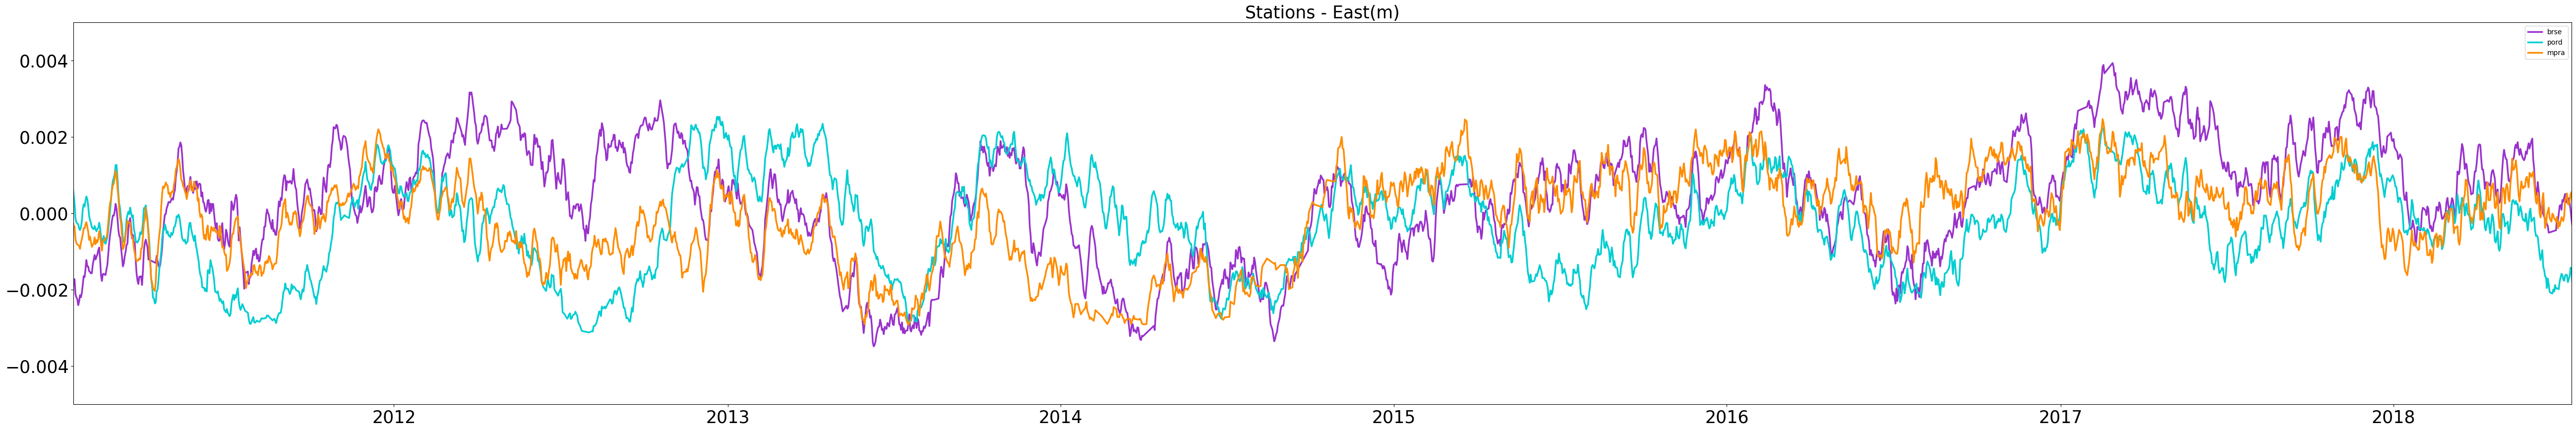

In [320]:
fig=plt.figure(figsize=(65,10))
plt.title('Stations - East(m)', fontsize = 25)

plt.plot(brse_rolmeanE, color='darkorchid', label='brse', lw=2.5)
plt.plot(pord_rolmeanE, color='darkturquoise', label='pord', lw=2.5)
plt.plot(mpra_rolmeanE, color='darkorange', label='mpra', lw=2.5)


plt.xlim(pd.Timestamp('2011-01-15'), pd.Timestamp('2018-07-15'))
plt.legend(loc='best')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylim(-0.005,0.005)

fl = 'stations_east.svg'
f = io.BytesIO()
#plt.savefig(fl, format="svg")

plt.show()

In [321]:
stations = pd.concat([brse_rolmeanE, pord_rolmeanE, mpra_rolmeanE], axis=1)
stations = stations.loc['2011-01-15':'2018-07-15']
stations

,brse_east(m),pord_east(m),mpra_east(m)
YYMMMDD,,,
2011-01-15,-0.001773,0.000490,-0.000314
2011-01-16,-0.001722,0.000275,-0.000344
2011-01-17,-0.002112,-0.000131,-0.000662
2011-01-18,-0.002197,-0.000227,-0.000777
2011-01-19,-0.002242,-0.000266,-0.000810
...,...,...,...
2018-07-11,0.000316,-0.001799,0.000251
2018-07-12,0.000399,-0.001707,0.000226
2018-07-13,0.000273,-0.001650,0.000338


In [269]:
stations['rolling_mean_stations'] = stations[['brse_east(m)', 'pord_east(m)', 'mpra_east(m)']].mean(axis=1).rolling(8, min_periods=1).mean()
stations

,brse_east(m),pord_east(m),mpra_east(m),rolling_mean_stations
YYMMMDD,,,,
2011-01-15,-0.001773,0.000490,-0.000314,-0.000532
2011-01-16,-0.001722,0.000275,-0.000344,-0.000565
2011-01-17,-0.002112,-0.000131,-0.000662,-0.000699
2011-01-18,-0.002197,-0.000227,-0.000777,-0.000791
2011-01-19,-0.002242,-0.000266,-0.000810,-0.000854
...,...,...,...,...
2018-07-11,0.000316,-0.001799,0.000251,-0.000405
2018-07-12,0.000399,-0.001707,0.000226,-0.000384
2018-07-13,0.000273,-0.001650,0.000338,-0.000368


In [270]:
print(stations.isnull().sum())

brse_east(m)             193
pord_east(m)             127
mpra_east(m)             176
rolling_mean_stations      0
dtype: int64


In [239]:
pd.options.mode.copy_on_write = True

stations_copy = stations.copy()
stations_copy.dropna(axis=0, inplace=True)
stations_copy

,brse_east(m),pord_east(m),mpra_east(m),rolling_mean_stations
YYMMMDD,,,,
2011-01-15,-0.001773,0.000490,-0.000314,-0.000532
2011-01-16,-0.001722,0.000275,-0.000344,-0.000565
2011-01-17,-0.002112,-0.000131,-0.000662,-0.000699
2011-01-18,-0.002197,-0.000227,-0.000777,-0.000791
2011-01-19,-0.002242,-0.000266,-0.000810,-0.000854
...,...,...,...,...
2018-07-11,0.000316,-0.001799,0.000251,-0.000405
2018-07-12,0.000399,-0.001707,0.000226,-0.000384
2018-07-13,0.000273,-0.001650,0.000338,-0.000368


In [322]:
print(stations_copy.isnull().sum())
print(stations_copy[stations_copy.isnull().any(axis=1)])

brse_east(m)             0
pord_east(m)             0
mpra_east(m)             0
rolling_mean_stations    0
dtype: int64
Empty DataFrame
Columns: [brse_east(m), pord_east(m), mpra_east(m), rolling_mean_stations]
Index: []


In [256]:
stations_reduced = pd.DataFrame(index=stations_copy.index, columns=['brse_east(m)', 'pord_east(m)', 'mpra_east(m)'])

stations_reduced['brse_east(m)'] = stations_copy['brse_east(m)'] - stations_copy['rolling_mean_stations']
stations_reduced['pord_east(m)'] = stations_copy['pord_east(m)'] - stations_copy['rolling_mean_stations']
stations_reduced['mpra_east(m)'] = stations_copy['mpra_east(m)'] - stations_copy['rolling_mean_stations']

print(stations_reduced)

            brse_east(m)  pord_east(m)  mpra_east(m)
YYMMMDD                                             
2011-01-15     -0.001240      0.001022      0.000218
2011-01-16     -0.001157      0.000839      0.000221
2011-01-17     -0.001413      0.000568      0.000037
2011-01-18     -0.001406      0.000564      0.000014
2011-01-19     -0.001388      0.000588      0.000044
...                  ...           ...           ...
2018-07-11      0.000720     -0.001395      0.000656
2018-07-12      0.000782     -0.001324      0.000610
2018-07-13      0.000641     -0.001282      0.000706
2018-07-14      0.000426     -0.001085      0.000845
2018-07-15      0.000157     -0.001144      0.000881

[2280 rows x 3 columns]


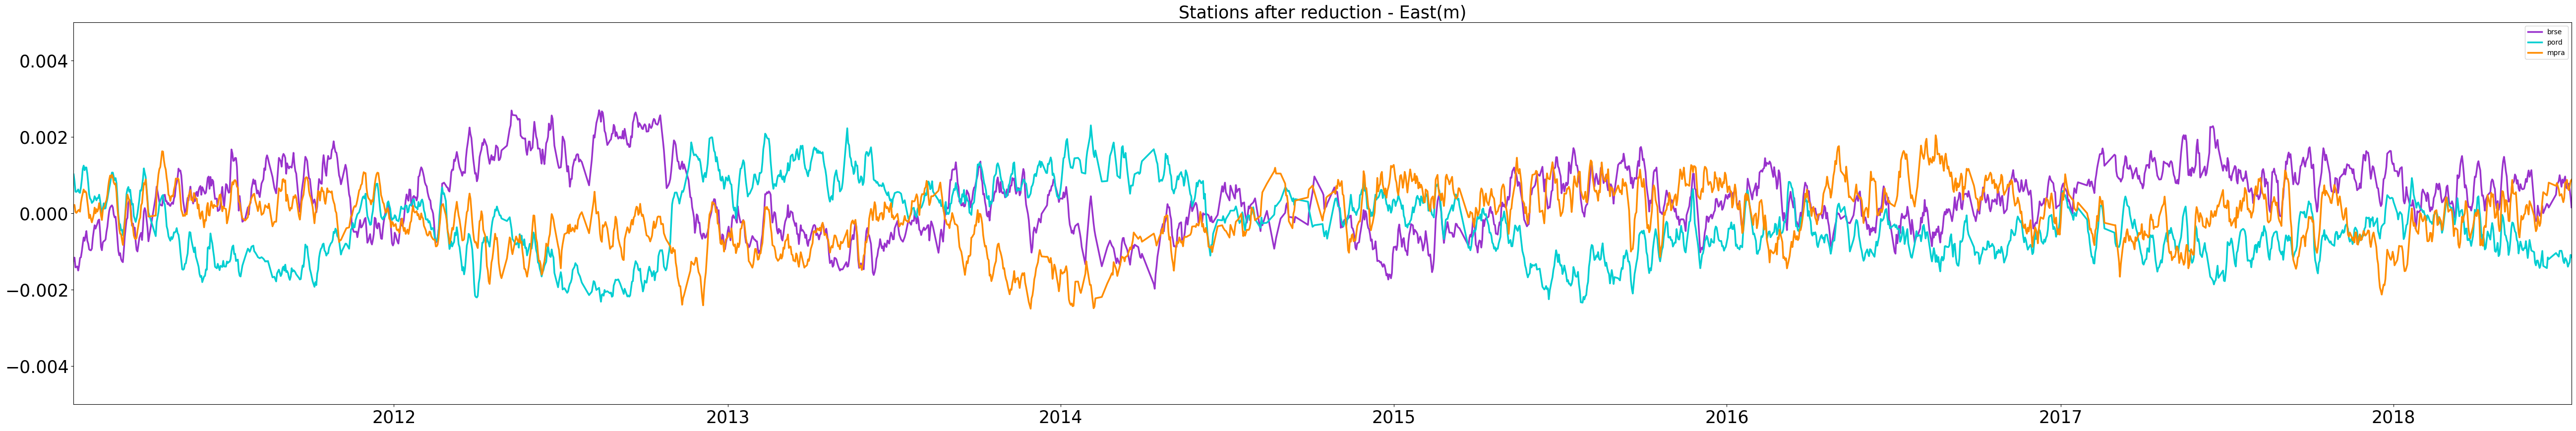

In [323]:
fig=plt.figure(figsize=(65,10))
plt.title('Stations after reduction - East(m)', fontsize = 25)

plt.plot(stations_reduced['brse_east(m)'], color='darkorchid', label='brse', lw=2.5)
plt.plot(stations_reduced['pord_east(m)'], color='darkturquoise', label='pord', lw=2.5)
plt.plot(stations_reduced['mpra_east(m)'], color='darkorange', label='mpra', lw=2.5)

plt.xlim(pd.Timestamp('2011-01-15'), pd.Timestamp('2018-07-15'))

plt.legend(loc='best')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylim(-0.005,0.005)

fl = 'stations_reduced_east.svg'
f = io.BytesIO()
plt.savefig(fl, format="svg")

plt.show()

In [405]:
min_length = min(len(actualValues), len(predictedValues))
actualValues = brseE_df['__east(m)'].dropna()
predictedValues = modelA_df['__east(m)'].dropna()

commonIndex = actualValues.index.intersection(predictedValues.index)
actualValues = actualValues.loc[commonIndex]
predictedValues = predictedValues.loc[commonIndex]

if actualValues.empty or predictedValues.empty:
    raise ValueError("NaN values still present after dropping.")

print(min_length)

3057


In [452]:
arimaBrseE_mse = mean_squared_error(actualValues, predictedValues)
print(f"ARIMA - Mean Squared Error: {arimaBrseE_mse}")

arimaBrseE_rmse = np.sqrt(mean_squared_error(actualValues, predictedValues))
print(f"ARIMA - Root Mean Squared Error: {arimaBrseE_rmse}")

arimaBrseE_mae = mean_absolute_error(actualValues, predictedValues)
print(f"ARIMA - Mean Absolute Error: {arimaBrseE_mae}")

arimaBrseE_r2 = r2_score(actualValues, predictedValues)
print(f"ARIMA - R-squared (R2): {arimaBrseE_r2}")

ARIMA - Mean Squared Error: 1.6137397559606849e-06
ARIMA - Root Mean Squared Error: 0.0012703305695608072
ARIMA - Mean Absolute Error: 0.0009830144966464897
ARIMA - R-squared (R2): 0.28970651854068585
